Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.92      0.92      0.92        13
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Accuracy: 0.9555555555555556


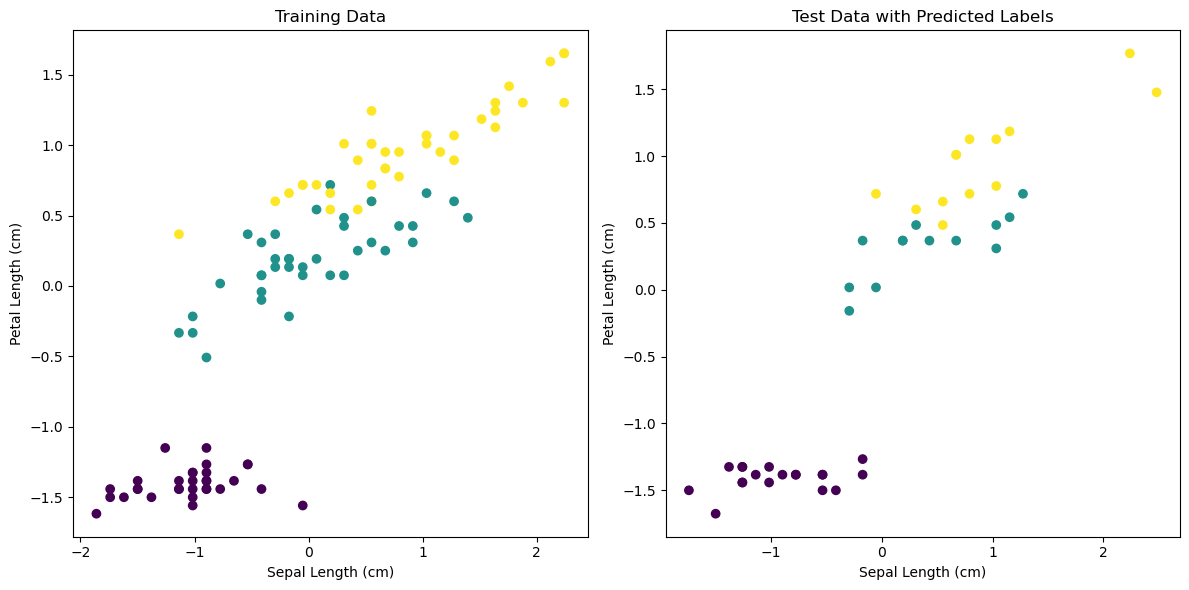

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Split the data into training and testing sets
X = iris_df[['sepal length (cm)', 'petal length (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a K-Nearest Neighbors (KNN) classifier
k = 3  # You can choose a different value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot for the training data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title("Training Data")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

# Scatter plot for the test data with predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.title("Test Data with Predicted Labels")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

plt.tight_layout()
plt.show()
